In [1]:
using DelimitedFiles;

In [2]:
function getAtStep(data_path::String, flag::String, step::Int64)
    data::Matrix{Float64} = readdlm(data_path * flag * "_$(step).csv", ',', Float64, '\n'; skipstart=1)
    return data
end

getAtStep (generic function with 1 method)

In [3]:
data_path::String = "../data/N256Re100t10/";
flag_list::Vector{String} = ["u", "v"];

In [4]:
step = 200;
u::Matrix{Float64} = getAtStep(data_path, flag_list[1], step);
v::Matrix{Float64} = getAtStep(data_path, flag_list[2], step);
N::Int64 = size(u)[1];
x::Vector{Float64} = LinRange(0, 1., N);
y::Vector{Float64} = LinRange(0, 1., N);

In [5]:
import PyPlot as plt;
rcParams = plt.PyDict(plt.matplotlib."rcParams");
rcParams["text.usetex"] = true;
figsize::Tuple{Float64, Float64} = (8, 6);
labelsize::Float64 = 25;
titlesize::Float64 = 30;
levels::Int64 = 50;
cmap::String = "jet";

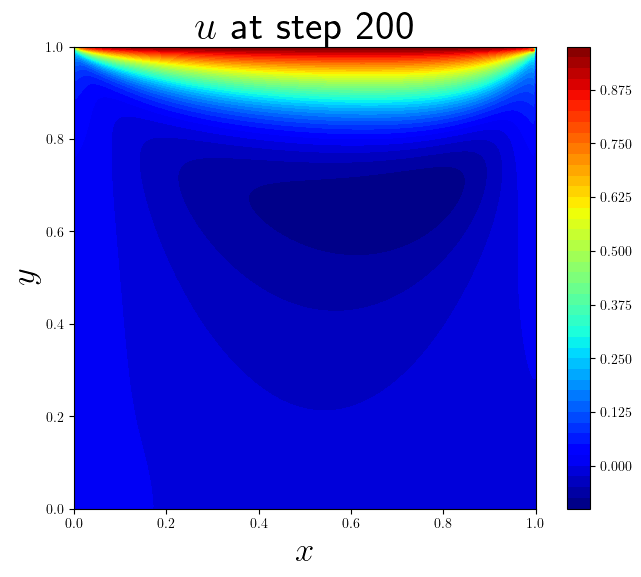

In [6]:
plt.figure(figsize=figsize);
plt.gca().set_aspect("equal");
plt.contourf(x, y, u, levels, cmap=cmap);
plt.colorbar();
plt.xlabel(raw"$x$", fontsize=labelsize);
plt.ylabel(raw"$y$", fontsize=labelsize);
plt.title("\$u\$ at step $(step)", fontsize=titlesize);
display(plt.gcf());
plt.show()

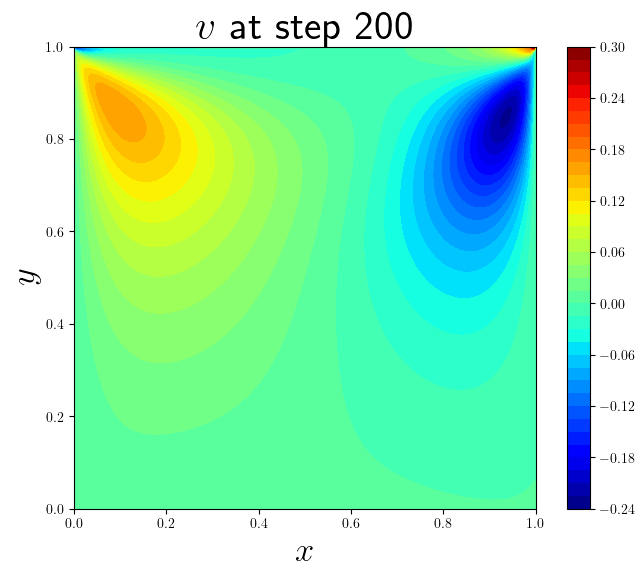

In [7]:
plt.figure(figsize=figsize);
plt.gca().set_aspect("equal");
plt.contourf(x, y, v, levels, cmap=cmap);
plt.colorbar();
plt.xlabel(raw"$x$", fontsize=labelsize);
plt.ylabel(raw"$y$", fontsize=labelsize);
plt.title("\$v\$ at step $(step)", fontsize=titlesize);
display(plt.gcf());
plt.show()

In [8]:
u_middle::Vector{Float64} = getAtStep(data_path, flag_list[1], 2000)[:, Int64(N/2)];

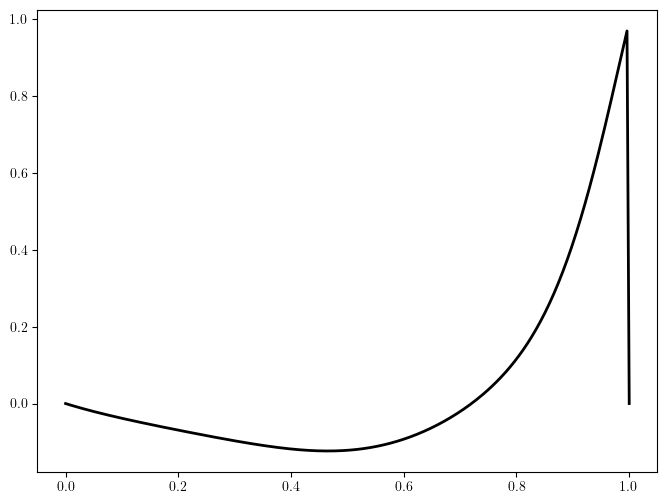

In [12]:
plt.figure(figsize=figsize);
plt.plot(x, u_middle, color="black", linewidth=2);
display(plt.gcf());
plt.show()